# 原始形式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 感知机原始形式
def perceptron(X, y, eta):
    w, b = np.zeros(X.shape[1]),0
    while ((y*(w.dot(X.T)+b))<=0).any():
        index = np.random.randint(X.shape[0])
        if y[index]*(w.dot(X[index])+b) <= 0:
            w = w + eta * y[index] * X[index]
            b = b + eta * y[index]
    def f(x):
        return np.sign(w.dot(x)+b)
    return w, b, f

In [9]:
# 把结果打印出来
def plotModel(X, w, b, f):
    for x in X:
        if f(x) == -1:
            plt.scatter(x[0],x[1], color='red')
        else:
            plt.scatter(x[0],x[1], color='blue')
    line_x0 = np.array([1, 5])
    if w[1] == 0:
        line_x0 = [-b/w[0], -b/w[0]]
        line_x1 = [-1, 3]
    else:
        line_x1 = np.array((-b - w[0]*line_x0) / w[1])
    # plt.scatter(X[index,0],X[index,1], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='#AB3319')
    plt.plot(line_x0, line_x1)
    plt.show()

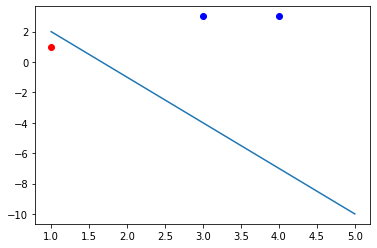

In [10]:
# 书上的例子
X = np.array([[3,3],[4,3],[1,1]])
w, b, f = perceptron(X, np.array([1,1,-1]), eta=1)
plotModel(X, w, b, f)

打一份线性可分的数据
我选择了skearn.datasets的iris数据第1类和第2类的后面两个特征

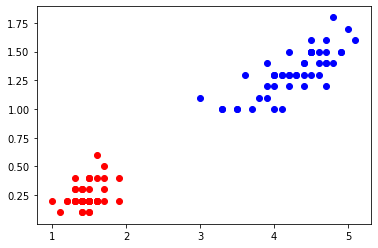

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,2:]
y = y[y<2]
plt.scatter(X[y==0,0],X[y==0,1], color='red')
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.show()

In [12]:
y[y==0]=-1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

由于感知机要求的y的标签为-1和1，当前y的标签为0，1
需要把标签0全部改成标签-1

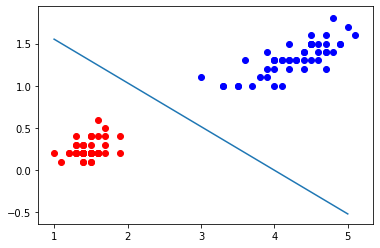

In [13]:
# iris数据
w, b, f = perceptron(X, y, eta=0.01)
plotModel(X, w, b, f)